# Исследование надежности заемщиков


**Описание проекта:**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных:**

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Откройте таблицу и изучите общую информацию о данных

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

# Загружаем файлы
try:
    data = pd.read_csv('/content/data.csv', sep=',', skipinitialspace = True)
except:
    print('Что-то не так с файлом. Проверь файл с данными.')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [5]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [7]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [8]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [9]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [10]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [11]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [12]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [13]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [14]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [15]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [16]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [17]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [18]:
data.duplicated().sum()

71

In [19]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [20]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [21]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [22]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [23]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [24]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64


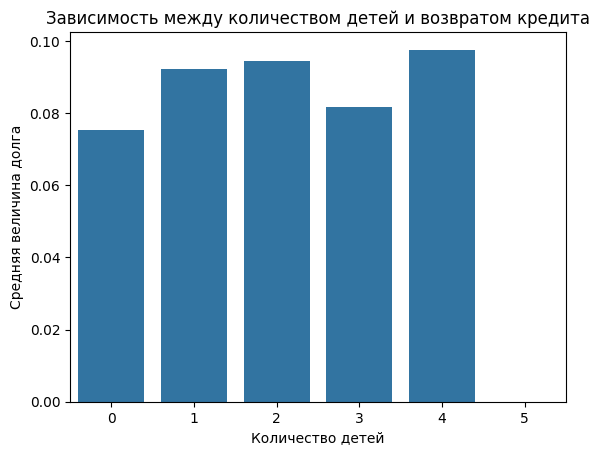

In [31]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
count_dept = data.groupby('children')['debt'].count()
sum_dept = data.groupby('children')['debt'].sum()
dependence = sum_dept / count_dept
unique_children = data['children'].unique()
print(dependence)

ax = sns.barplot(x=sorted(unique_children), y=dependence)

ax.set_title('Зависимость между количеством детей и возвратом кредита')

ax.set_xlabel('Количество детей')

ax.set_ylabel('Средняя величина долга')

plt.show()

**Вывод:** Первым шагом мы сгруппировали данные по количеству детей. А затем посчитали коичество ячеек в каждой из получившихся категорий. После чего ищем сумму по каждой категории. Поделив количество на сумму узнаем средний показатель для каждой категории. Янвной зависимости между количеством детей и возвратом долгов не наблюдается. Наиболее дисциплинированными являются люди у которых 5 детей, наименее дисциплинированны у кого в семье 4 ребенка.


#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

family_status
Не женат / не замужем    0.097639
в разводе                0.070648
вдовец / вдова           0.066246
гражданский брак         0.093130
женат / замужем          0.075606
Name: debt, dtype: float64


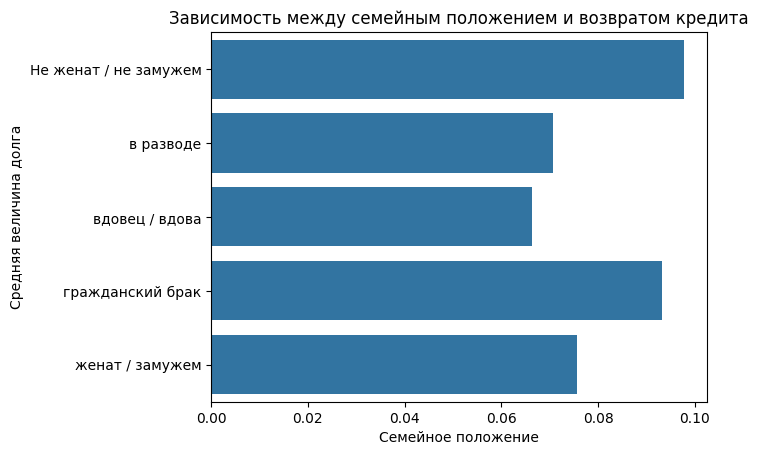

In [34]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
count_dept = data.groupby('family_status')['debt'].count()
sum_dept = data.groupby('family_status')['debt'].sum()
dependence = sum_dept / count_dept
unique_family_status = data['family_status'].unique()
print(dependence)
ax = sns.barplot(x = dependence, y = sorted(unique_family_status))

ax.set_title('Зависимость между семейным положением и возвратом кредита')

ax.set_xlabel('Семейное положение')

ax.set_ylabel('Средняя величина долга')

plt.show()

**Вывод:** Аналогично первой гипотезе. Находим количество записей по каждой категории в столбце Семейное положение. Затем находим сумму по столбцу наличия долга. После чего берем средний показатель по каждой категории. И приходим к выводу что более склонны иметь долги люди с семейным положением "Не женат/не замужем" и "Гражданкский брак". Менее склонны в статусах "Женат/замужем", "В разводе", "Вдовец/вдова".

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64


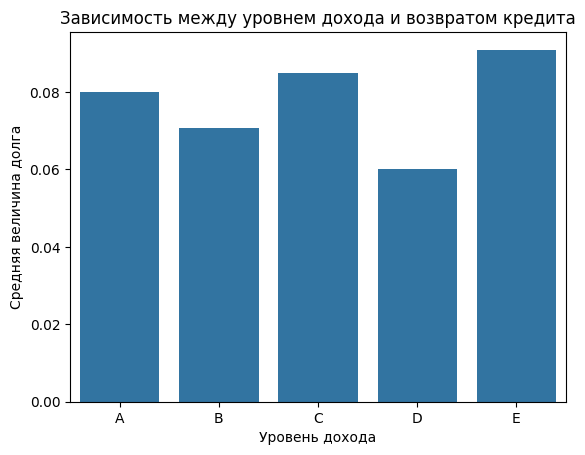

In [35]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
count_dept = data.groupby('total_income_category')['debt'].count()
sum_dept = data.groupby('total_income_category')['debt'].sum()
dependence = sum_dept / count_dept
unique_income_category = data['total_income_category'].unique()
print(dependence)
ax = sns.barplot(x = sorted(unique_income_category), y = dependence)

ax.set_title('Зависимость между уровнем дохода и возвратом кредита')

ax.set_xlabel('Уровень дохода')

ax.set_ylabel('Средняя величина долга')

plt.show()

**Вывод:** Явная зависимость отсутствует. Наиболее склонны к наличию долга люди из категории Е, а наименее из категории D

<div class="alert alert-block alert-success">
<b> ✔️ Комментарий ревьюера:</b> Тут тоже важно количество данных в группах, было бы хорошо в сводной таблице вывести общее число клиентов, а не только доли. </div>

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: debt, dtype: float64


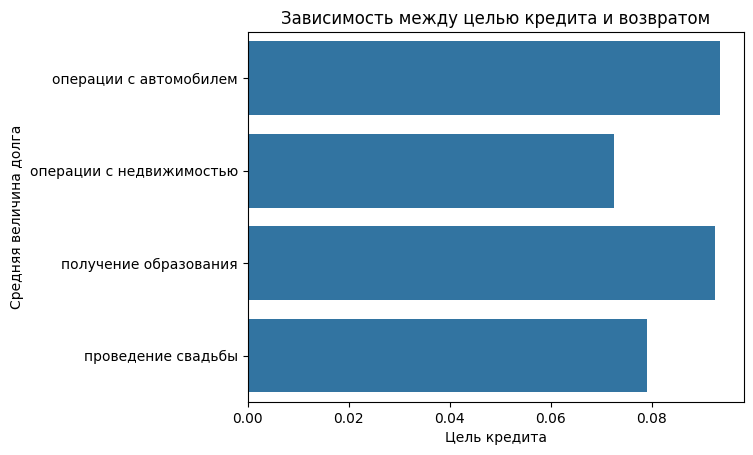

In [36]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
count_dept = data.groupby('purpose_category')['debt'].count()
sum_dept = data.groupby('purpose_category')['debt'].sum()
dependence = sum_dept / count_dept
unique_purpose_category = data['purpose_category'].unique()
print(dependence)
ax = sns.barplot(x = dependence, y = sorted(unique_purpose_category))

ax.set_title('Зависимость между целью кредита и возвратом')

ax.set_xlabel('Цель кредита')

ax.set_ylabel('Средняя величина долга')

plt.show()

**Вывод:** В категории "Операции с автомобилем" наблюдается наибольшее количество долгов. А вот в "Операции с недвижимостью" наименьшее.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Причины наличия пропусков могуть случайными и не случайными. К первым можно отнести пропуски по ошибке, то есть тот кто собирал данные что-то не указал, либо мог указать не верно. Так же к ним можно отнести различные ошибки при чтении или записи файла. Не случайные ошибки могут появляться по разным причинам. Например определенные категории граждан при опросе отказываются называть какую-либо информаци(уровень дохода как вариант). Так же к этой категории ошибок можно отнести ошибки при формировании выгрузки или файла. То есть какой-то из показателей подтягвается не в нужном формате, либо формат не распознан.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Если мы имеем дело с количественными переменными, значит мы можем их сравнивать. В этом случае у нас есть два варианта для заполнения пропусков - это либо среднее значение, либо медианное. Выбирая из двух этих вариантов медианное будет точнее так как медиана - это такое число половина выборки больше которого, а вторая половина меньше. Это число находится ровно посередине выборки. При этом среднее значение может быть не настолько точным, так как наличие очень больших значений(или маленьких) может влиять на изменение данного значения, что в итоге может сказаться на резульатах анализа вцелом.

### Шаг 4: общий вывод.

В результате анализа требовалось проверить несколько гипотез.

1) Первая гипотеза о зависимости между количеством детей и возвратом кредита в срок не подтвердилась. Так как янвной зависимости между количеством детей и возвратом долгов не наблюдается. Наиболее дисциплинированными являются люди у которых 5 детей, наименее дисциплинированны у кого в семье 4 ребенка.

2) Зависимость между семейным положением и возвратом кредита в срок?
Пришли к выводу что более склонны иметь долги люди с семейным положением "Не женат/не замужем" и "Гражданкский брак". Менее склонны в статусах "Женат/замужем", "В разводе", "Вдовец/вдова".

3) Зависимость между уровнем дохода и возвратом кредита в срок?
Как и в первой гипотезе явная зависимость отсутствует. Наиболее склонны к наличию долга люди из категории Е, а наименее из категории D.

4) Как разные цели кредита влияют на его возврат в срок?
В категории "Операции с автомобилем" наблюдается наибольшее количество долгов. А вот в "Операции с недвижимостью" наименьшее. Если ранжировать по убыванию от наибольшего к меньшему получим следующий список целей:
- Операции с автомобилем;
- Получение образования;
- Проведение свадьбы;
- Операции с недвижимостью.